In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
os.chdir('/home/ankushraut/Downloads/dataquest')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


### Imbalanced dataset

In [4]:
train.criticality.value_counts()

0    11255
1      522
Name: criticality, dtype: int64

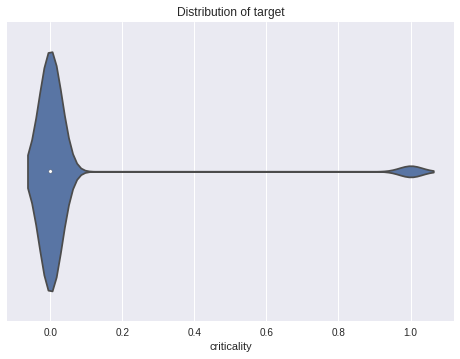

In [5]:
plt.title('Distribution of target')
sns.violinplot(train.criticality)
plt.show()

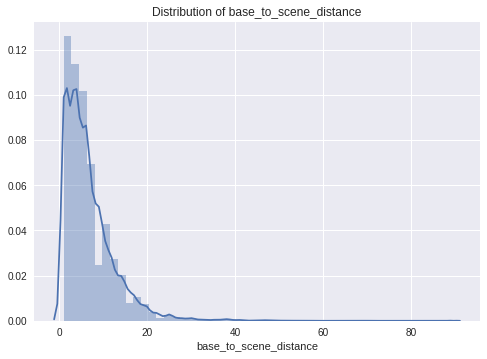

In [6]:
plt.title('Distribution of base_to_scene_distance')
sns.distplot(train.base_to_scene_distance)
plt.show()

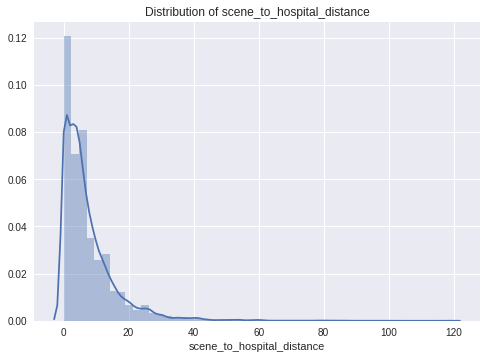

In [7]:
plt.title('Distribution of scene_to_hospital_distance')
sns.distplot(train.scene_to_hospital_distance)
plt.show()

In [8]:
train.isnull().values.any()

True

In [9]:
train.incident_location.isnull().values.sum()/len(train)

0.026067759191644731

In [10]:
train.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


### To keep the model simplistic, null values are simply filled using the value before. Moreover, the feature with null values is going to get eliminated from the final model.

In [11]:
train = train.fillna(method = 'bfill', axis = 0)
test = test.fillna(method = 'bfill', axis = 0)

In [12]:
from sklearn.preprocessing import LabelEncoder

### One hot encoding of categorical features

In [13]:
train = train.join(pd.get_dummies(train.incident_tehsil))
#train.rename(columns={'Raipur':'rai', 'Doiwala':'doi', 'Sahaspur':'saha', 'Vikasnagar':'vikas','Dehradun'
                   #  :'dehra', 'Chakrata':'chakra', 'Kalsi':'kal'}, inplace=True)
#train = train.join(pd.get_dummies(train.incident_location))
train = train.join(pd.get_dummies(train.cause_of_emergency))
train = train.join(pd.get_dummies(train.roadway_feature))
train = train.join(pd.get_dummies(train.road_type))
train = train.join(pd.get_dummies(train.surrounding_area))

test = test.join(pd.get_dummies(test.incident_tehsil))
#test.rename(columns={'Raipur':'rai', 'Doiwala':'doi', 'Sahaspur':'saha', 'Vikasnagar':'vikas','Dehradun'
                    # :'dehra', 'Chakrata':'chakra', 'Kalsi':'kal'}, inplace=True)
#test = test.join(pd.get_dummies(test.incident_location))
test = test.join(pd.get_dummies(test.cause_of_emergency))
test = test.join(pd.get_dummies(test.roadway_feature))
test = test.join(pd.get_dummies(test.road_type))
test = test.join(pd.get_dummies(test.surrounding_area))

#test = test.reindex(columns = train.columns, fill_value=0)
#train['base_to_scene_distance'] = np.log(train['base_to_scene_distance'])

In [14]:
train.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,Chakrata,Dehradun,Doiwala,Kalsi,Raipur,Sahaspur,Vikasnagar,2 Wheeler accidents,Auto (3 Wheeler accidents),Extrication>20mts,MCI,MVC - Pedestrian (Run Over/Hit & Run),MVC-Fixed object (Divider),MVC-MV,MVC-Non traffic inside a parked vehicle/Skidding,MVC-Thrown off from Vehicle,Multiple Vehicular Incident,"Non motorised vehicle accidents(Bullock cart,Bicycle,Rickshaw,Push cart)",Railroad Train/Other Object,Vehicle -Fall From Height etc.,Vehicle role over/Skid,CUR,INT,SLP,STR,UNK,HIW,LOC,AGL,COL,FOR,HIL,HOSP,MAR
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [15]:
lbl1 = LabelEncoder()
#lbl2 = LabelEncoder()
#lbl3 = LabelEncoder()
#lbl4 = LabelEncoder()
#lbl5 = LabelEncoder()
#lbl6 = LabelEncoder()

#train.incident_location = lbl1.fit_transform(train.incident_location)
#test.incident_location = lbl1.fit_transform(test.incident_location)

train['incident_location'] = lbl1.fit_transform(train['incident_location'])
test['incident_location'] = test['incident_location'].map(lambda s: '<unknown>' if s not in lbl1.classes_ else s)
lbl1.classes_ = np.append(lbl1.classes_, '<unknown>')
test['incident_location'] = lbl1.transform(test['incident_location'])

#train.incident_tehsil = lbl2.fit_transform(train.incident_tehsil)
#test.incident_tehsil = lbl2.fit_transform(test.incident_tehsil)

#train.cause_of_emergency = lbl3.fit_transform(train.cause_of_emergency)
#test.cause_of_emergency = lbl3.transform(test.cause_of_emergency)

#train.roadway_feature = lbl4.fit_transform(train.roadway_feature)
#test.roadway_feature = lbl4.transform(test.roadway_feature)

#train.road_type = lbl5.fit_transform(train.road_type)
#test.road_type = lbl5.transform(test.road_type)

#train.surrounding_area = lbl6.fit_transform(train.surrounding_area)
#test.surrounding_area = lbl6.transform(test.surrounding_area)

### Using information from timestamps.

In [16]:
train.incident_time = pd.to_datetime(train.incident_time)
train['hour'] = train.incident_time.dt.hour
train['minute'] = train.incident_time.dt.minute

test.incident_time = pd.to_datetime(test.incident_time)
test['hour'] = test.incident_time.dt.hour
test['minute'] = test.incident_time.dt.minute

train.incident_date = pd.to_datetime(train.incident_date)
train['day'] = train.incident_date.dt.day
train['month'] = train.incident_date.dt.month
train['week'] = train.incident_date.dt.week
train['year'] = train.incident_date.dt.year

test.incident_date = pd.to_datetime(test.incident_date)
test['day'] = test.incident_date.dt.day
test['month'] = test.incident_date.dt.month
test['week'] = test.incident_date.dt.week
test['year'] = test.incident_date.dt.year

train = train.drop(labels = ['incident_time', 'incident_date'], axis = 1)
test = test.drop(labels = ['incident_time', 'incident_date'], axis = 1)

### Extra feature created by adding both the distance features.

In [17]:
train['base_to_hospital_distance'] = train['base_to_scene_distance'] + train['scene_to_hospital_distance']
test['base_to_hospital_distance'] = test['base_to_scene_distance'] + test['scene_to_hospital_distance']

In [18]:
training = train.drop(labels = ['victim_id', 'criticality', 'incident_tehsil', 'cause_of_emergency', 'roadway_feature', 'road_type', 'surrounding_area', 'incident_location'], axis = 1)
testing = test.drop(labels = ['victim_id','incident_tehsil', 'cause_of_emergency', 'roadway_feature', 'road_type', 'surrounding_area', 'incident_location'], axis = 1)
target = train['criticality']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xdata, xtest, ydata, ytest = train_test_split(training, target, test_size = 0.1, random_state = 1, stratify = target)
xdata = xdata.reset_index(drop = True)
xtest = xtest.reset_index(drop = True)
ydata = ydata.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)

In [21]:
xtrain, xval, ytrain, yval = train_test_split(xdata, ydata, test_size = 0.25, random_state = 1, stratify = ydata)
xtrain = xtrain.reset_index(drop = True)
xval = xval.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
yval = yval.reset_index(drop = True)

In [22]:
import xgboost as xgb

/home/ankushraut/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
params = {"objective":"binary:logistic",
          "booster":"gbtree",
          "eta":0.1,
          "max_depth": 3,
         "subsample":0.95,
         "silent":0,
         "seed":1,
         "lambda":.01,
         "alpha":.01,
         "eval_metric":"auc"}

num_boost_round = 1000

dtrain = xgb.DMatrix(xtrain, ytrain)
dvalid = xgb.DMatrix(xval, yval)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

booster = xgb.train(params, dtrain, num_boost_round, evals = watchlist, early_stopping_rounds = 25)

[0]	train-auc:0.765444	eval-auc:0.711299
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 25 rounds.
[1]	train-auc:0.767461	eval-auc:0.712579
[2]	train-auc:0.770271	eval-auc:0.712581
[3]	train-auc:0.77044	eval-auc:0.712832
[4]	train-auc:0.778679	eval-auc:0.728983
[5]	train-auc:0.778321	eval-auc:0.728554
[6]	train-auc:0.777817	eval-auc:0.725883
[7]	train-auc:0.7785	eval-auc:0.726633
[8]	train-auc:0.783124	eval-auc:0.734443
[9]	train-auc:0.784553	eval-auc:0.738192
[10]	train-auc:0.785296	eval-auc:0.73784
[11]	train-auc:0.794223	eval-auc:0.748169
[12]	train-auc:0.794422	eval-auc:0.748427
[13]	train-auc:0.794845	eval-auc:0.748116
[14]	train-auc:0.796827	eval-auc:0.753195
[15]	train-auc:0.797235	eval-auc:0.75364
[16]	train-auc:0.797969	eval-auc:0.754795
[17]	train-auc:0.799825	eval-auc:0.756654
[18]	train-auc:0.801023	eval-auc:0.75775
[19]	train-auc:0.801217	eval-auc:0.758446
[20]	train-auc:0.802025	eval-auc:0.

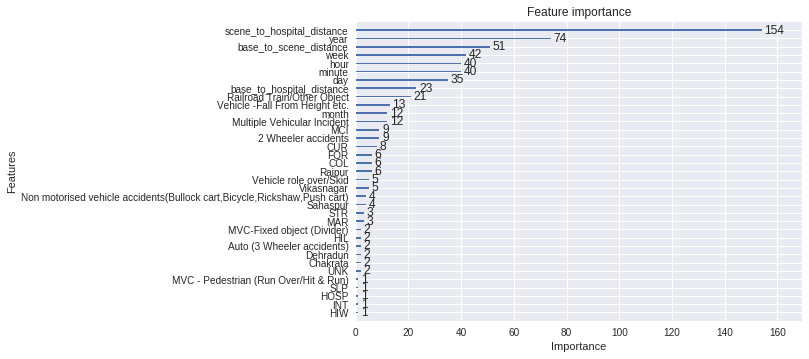

In [24]:
xgb.plot_importance(booster, xlabel='Importance', ylabel='Features')
plt.show()

In [25]:
performance = booster.predict(xgb.DMatrix(xtest))

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [27]:
roc_auc_score(ytest, performance)

0.78554105752151937

### ROC curve

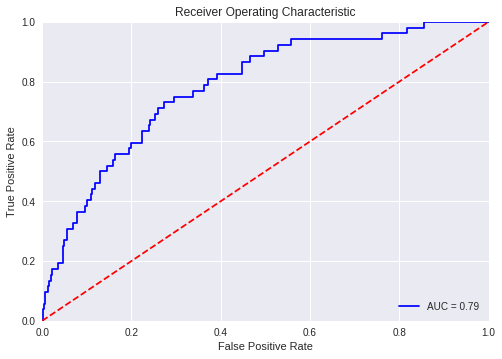

In [28]:
preds = performance
fpr, tpr, threshold = roc_curve(ytest, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
predictions = booster.predict(xgb.DMatrix(testing))

In [30]:
submission['criticality'] = pd.DataFrame({'criticality':predictions})

In [31]:
submission.to_csv('sub1.csv', index = False)